https://github.com/thomasstxyz/fhb-mcce-aktt1-teja-python-assign1/blob/main/notebooks/aktt1-teja-assignment2.ipynb

# Assignment 2

This assignment is related to the attached file:

“healthcare-dataset-stroke-data.csv”

(Source: Kaggle https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset ).

Use pandas /and or numpy, if needed) for finding answers to the following questions. Plot graphs wherever relevant:

- In the given dataset, what is the percentage (of all the persons in the dataset) of 70 years old or older who suffered a stroke?
- In the given dataset, what is the percentage (of all the persons in the dataset) of 70 years old or older who suffered a stroke and are smokers / former smokers?
- What percentage of those who suffered a stroke have “avg_glucose_level” at least 20% above the mean value of the entire dataset?
- Are all age groups equally represented in this dataset?

Note: Do not change the data in the original file. Any data you might want to change, change it in the dataframe after importing the CSV file.

Please submit your Jupyter notebook with the code AND a PDF file showing the results of the executed code.

In [1]:
import pandas as pd
from datetime import date
from datetime import datetime

In [2]:
data = pd.read_csv("files/healthcare-dataset-stroke-data.csv", sep=',')

In [3]:
def percentage(part, whole):
  return 100 * float(part)/float(whole)

## Q1: In the given dataset, what is the percentage (of all the persons in the dataset) of 70 years old or older who suffered a stroke?

In [4]:
x = data.query('age > 70 and stroke == 1')
x = percentage(len(x), len(data))
x = round(x, 2)

print(f'The percentage of persons who are over 70 years old and suffered a stroke is {x}%.')

The percentage of persons who are over 70 years old and suffered a stroke is 2.5%.


## Q2: In the given dataset, what is the percentage (of all the persons in the dataset) of 70 years old or older who suffered a stroke and are smokers / former smokers?

In [5]:
x = data.query('age >= 70 and stroke == 1 and (smoking_status == "formerly smoked" or smoking_status == "smokes")')
x = percentage(len(x), len(data))
x = round(x, 2)

print(f'The percentage of persons who are over 70 years old and suffered a stroke and formerly smoked or still smoke is {x}%.')

The percentage of persons who are over 70 years old and suffered a stroke and formerly smoked or still smoke is 1.0%.


## Q3: What percentage of those who suffered a stroke have “avg_glucose_level” at least 20% above the mean value of the entire dataset?

In [6]:
avg_glucose_level__mean = data['avg_glucose_level'].mean()
twenty_percent_above_mean = avg_glucose_level__mean * 1.2

stroke_data = data[data['stroke'] == 1]

x = stroke_data[stroke_data['avg_glucose_level'] >= twenty_percent_above_mean]
x = percentage(len(x), len(stroke_data))
x = round(x, 2)

print(f'The percentage of persons who suffered a stroke and have "avg_glucose_level" at least 20% above the mean is {x}%.')

The percentage of persons who suffered a stroke and have "avg_glucose_level" at least 20% above the mean is 39.76%.


## Q4: Are all age groups equally represented in this dataset?

No, all age groups are not equally represented in this dataset, as you see in the histogram.


array([[<AxesSubplot: title={'center': 'age'}>]], dtype=object)

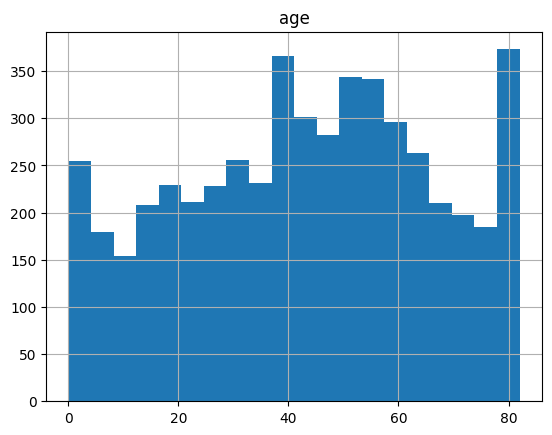

In [7]:
print(f'No, all age groups are not equally represented in this dataset, as you see in the histogram.')

data.hist(column='age', bins=20)

## Additional evaluation of question 4

In [8]:
age_groups = [
  {'name': 'children', 'age_range': 'age <= 14'},
  {'name': 'teenagers', 'age_range': '15 <= age <= 24'},
  {'name': 'adults', 'age_range': '25 <= age <= 64'},
  {'name': 'seniors', 'age_range': 'age >= 65'},
]

for idx, age_group in enumerate(age_groups):
    x = data.query(str(age_groups[idx]['age_range']))
    age_groups[idx].update({'person_count': len(x)})
    x = percentage(len(x), len(data))
    x = round(x, 2)
    age_groups[idx].update({'percentage': x})

    print(f'The age group "{age_groups[idx]["name"]}" with {age_groups[idx]["person_count"]} persons ({age_groups[idx]["age_range"]}) makes up {age_groups[idx]["percentage"]}% of all persons in this dataset.')

The age group "children" with 699 persons (age <= 14) makes up 13.68% of all persons in this dataset.
The age group "teenagers" with 537 persons (15 <= age <= 24) makes up 10.51% of all persons in this dataset.
The age group "adults" with 2847 persons (25 <= age <= 64) makes up 55.71% of all persons in this dataset.
The age group "seniors" with 1027 persons (age >= 65) makes up 20.1% of all persons in this dataset.
